# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [7]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [9]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

print(*cities)

Number of cities in the list: 613
lagoa lasa khatanga saskylakh puerto ayora ushuaia vaini hermanus ancud provideniya butaritari hilo tarakan tiksi hobart kruisfontein omboue bluff camacha mar del plata avarua albany atuona fartura belmonte rikitea saleaula mendoza ostrovnoy beringovskiy cabo san lucas taolanaro vao portsmouth tasiilaq bathurst zhigansk barrow yuzhou lazo nikolskoye norman wells saldanha sena madureira kodiak nouadhibou mahebourg codrington roald shumskiy cayenne chuy lenger pathein guasave ilulissat thompson broken hill cuamba altay kununurra bandundu cherskiy san blas maceio lasem mandalgovi busselton louisbourg hithadhoo manta chokurdakh tucuman thurso awjilah sitka tinskoy guanica fortuna pevek jamestown manavalakurichi arraial do cabo carnarvon longyearbyen port elizabeth coahuayana attawapiskat gorontalo punta arenas baracoa bredasdorp mataura kraslava havelock rafai kahului port hardy chato abis hamilton tazovskiy leningradskiy big rapids east london arica kapir

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [10]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key + "&q="
# query_url = url + "appid=" + weather_api_key + "&q="


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lagoa
Processing Record 2 of Set 1 | lasa
Processing Record 3 of Set 1 | khatanga
Processing Record 4 of Set 1 | saskylakh
Processing Record 5 of Set 1 | puerto ayora
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | vaini
Processing Record 8 of Set 1 | hermanus
Processing Record 9 of Set 1 | ancud
Processing Record 10 of Set 1 | provideniya
Processing Record 11 of Set 1 | butaritari
Processing Record 12 of Set 1 | hilo
Processing Record 13 of Set 1 | tarakan
Processing Record 14 of Set 1 | tiksi
Processing Record 15 of Set 1 | hobart
Processing Record 16 of Set 1 | kruisfontein
Processing Record 17 of Set 1 | omboue
Processing Record 18 of Set 1 | bluff
Processing Record 19 of Set 1 | camacha
Processing Record 20 of Set 1 | mar del plata
Processing Record 21 of Set 1 | avarua
Processing Record 22 of Set 1 | albany
Processing Record 23 of Set 1 | atuona
Processing Record 24 of

Processing Record 40 of Set 4 | gladstone
Processing Record 41 of Set 4 | nelson
Processing Record 42 of Set 4 | talnakh
Processing Record 43 of Set 4 | malakal
Processing Record 44 of Set 4 | yunjinghong
City not found. Skipping...
Processing Record 45 of Set 4 | hammonton
Processing Record 46 of Set 4 | kawalu
Processing Record 47 of Set 4 | tshane
Processing Record 48 of Set 4 | nurota
Processing Record 49 of Set 4 | ambilobe
Processing Record 0 of Set 5 | belushya guba
City not found. Skipping...
Processing Record 1 of Set 5 | murmashi
Processing Record 2 of Set 5 | saint-philippe
Processing Record 3 of Set 5 | ugoofaaru
Processing Record 4 of Set 5 | srednekolymsk
Processing Record 5 of Set 5 | san patricio
Processing Record 6 of Set 5 | ponta do sol
Processing Record 7 of Set 5 | cidreira
Processing Record 8 of Set 5 | vaitupu
City not found. Skipping...
Processing Record 9 of Set 5 | karasburg
Processing Record 10 of Set 5 | puerto escondido
Processing Record 11 of Set 5 | tete


Processing Record 31 of Set 8 | lebu
Processing Record 32 of Set 8 | carutapera
Processing Record 33 of Set 8 | les herbiers
Processing Record 34 of Set 8 | louis trichardt
Processing Record 35 of Set 8 | isangel
Processing Record 36 of Set 8 | tungkang
City not found. Skipping...
Processing Record 37 of Set 8 | korla
Processing Record 38 of Set 8 | locri
Processing Record 39 of Set 8 | nuuk
Processing Record 40 of Set 8 | ludvika
Processing Record 41 of Set 8 | huntsville
Processing Record 42 of Set 8 | caravelas
Processing Record 43 of Set 8 | konevo
Processing Record 44 of Set 8 | santa isabel do rio negro
Processing Record 45 of Set 8 | humaita
Processing Record 46 of Set 8 | tanjong sepat
City not found. Skipping...
Processing Record 47 of Set 8 | kamenka
Processing Record 48 of Set 8 | kogon
Processing Record 49 of Set 8 | kaele
Processing Record 0 of Set 9 | tumannyy
City not found. Skipping...
Processing Record 1 of Set 9 | biak
Processing Record 2 of Set 9 | padang
Processing 

Processing Record 17 of Set 12 | san pedro de los naranjos
Processing Record 18 of Set 12 | luceville
City not found. Skipping...
Processing Record 19 of Set 12 | gold coast
Processing Record 20 of Set 12 | mahon
Processing Record 21 of Set 12 | baherden
Processing Record 22 of Set 12 | ust-maya
Processing Record 23 of Set 12 | lubawa
Processing Record 24 of Set 12 | hof
Processing Record 25 of Set 12 | burgersdorp
Processing Record 26 of Set 12 | baboua
City not found. Skipping...
Processing Record 27 of Set 12 | haines junction
Processing Record 28 of Set 12 | luis correia
Processing Record 29 of Set 12 | taitung
Processing Record 30 of Set 12 | yarmouth
Processing Record 31 of Set 12 | xichang
Processing Record 32 of Set 12 | lake charles
Processing Record 33 of Set 12 | nam tha
City not found. Skipping...
Processing Record 34 of Set 12 | tynda
Processing Record 35 of Set 12 | shreveport
Processing Record 36 of Set 12 | bargal
City not found. Skipping...
Processing Record 37 of Set 

In [11]:
# Convert the cities weather data into a Pandas DataFrame

city_data_df = pd.DataFrame(city_data, columns=["City","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed","Country","Date"])

# Show Record Count
city_data_df.count()

City          564
Lat           564
Lng           564
Max Temp      564
Humidity      564
Cloudiness    564
Wind Speed    564
Country       564
Date          564
dtype: int64

In [12]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,lagoa,39.0500,-27.9833,19.87,75,73,2.87,PT,1687683634
1,lasa,46.6166,10.7002,23.35,35,0,1.12,IT,1687683635
2,khatanga,71.9667,102.5000,16.74,35,54,4.60,RU,1687683635
3,saskylakh,71.9167,114.0833,11.84,54,39,4.64,RU,1687683636
4,puerto ayora,-0.7393,-90.3518,24.75,95,97,1.79,EC,1687683637


In [13]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [14]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,lagoa,39.0500,-27.9833,19.87,75,73,2.87,PT,1687683634
1,lasa,46.6166,10.7002,23.35,35,0,1.12,IT,1687683635
2,khatanga,71.9667,102.5000,16.74,35,54,4.60,RU,1687683635
3,saskylakh,71.9167,114.0833,11.84,54,39,4.64,RU,1687683636
4,puerto ayora,-0.7393,-90.3518,24.75,95,97,1.79,EC,1687683637


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

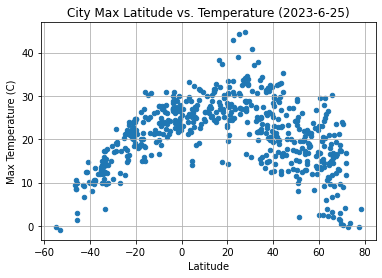

In [16]:
# Build scatter plot for latitude vs. temperature

# Incorporate the other graph properties

city_data_df.plot.scatter("Lat", "Max Temp",title="City Max Latitude vs. Temperature (2023-6-25)", grid=True)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")

# Save the figure
plt.savefig("output_data/Fig1.png", dpi = 150)

# Show plot
plt.show()

#### Latitude Vs. Humidity

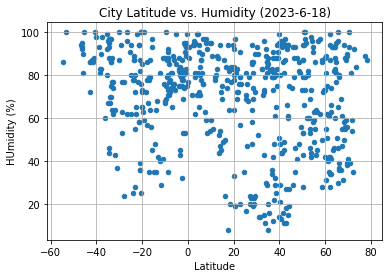

In [17]:
# Build the scatter plots for latitude vs. humidity
# Incorporate the other graph properties

city_data_df.plot.scatter("Lat", "Humidity",title="City Latitude vs. Humidity (2023-6-18)", grid=True)
plt.xlabel("Latitude")
plt.ylabel("HUmidity (%)")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

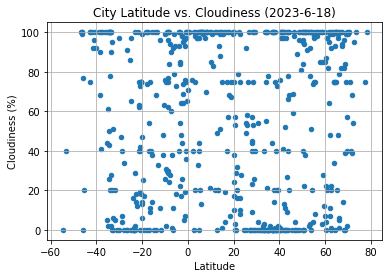

In [18]:
# Build the scatter plots for latitude vs. cloudiness
# Incorporate the other graph properties

city_data_df.plot.scatter("Lat", "Cloudiness",title="City Latitude vs. Cloudiness (2023-6-18)", grid=True)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

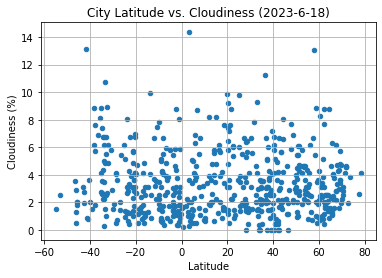

In [19]:
# Build the scatter plots for latitude vs. wind speed
# Incorporate the other graph properties

city_data_df.plot.scatter("Lat", "Wind Speed",title="City Latitude vs. Cloudiness (2023-6-18)", grid=True)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

In [20]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.drop(city_data_df[city_data_df["Lat"] < 0].index)

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,lagoa,39.0500,-27.9833,19.87,75,73,2.87,PT,1687683634
1,lasa,46.6166,10.7002,23.35,35,0,1.12,IT,1687683635
2,khatanga,71.9667,102.5000,16.74,35,54,4.60,RU,1687683635
3,saskylakh,71.9167,114.0833,11.84,54,39,4.64,RU,1687683636
9,provideniya,64.3833,-173.3000,11.01,83,93,0.90,RU,1687683639


In [21]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.drop(city_data_df[city_data_df["Lat"] >= 0].index)

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,puerto ayora,-0.7393,-90.3518,24.75,95,97,1.79,EC,1687683637
5,ushuaia,-54.8000,-68.3000,-0.19,86,0,1.54,AR,1687683637
6,vaini,-21.2000,-175.2000,20.09,94,40,1.03,TO,1687683638
7,hermanus,-34.4187,19.2345,12.67,95,100,4.36,ZA,1687683638
8,ancud,-41.8697,-73.8203,12.48,87,100,13.15,CL,1687683621


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.600933980778739


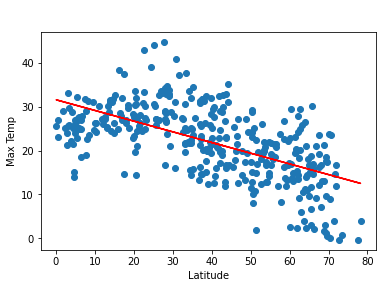

In [25]:
# Linear regression on Northern Hemisphere

northern_hemi_df.plot.scatter("Lat", "Max Temp")
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
print(f"The r-value is: {rvalue}")
plt.show()

The r-value is: 0.8609119516409531


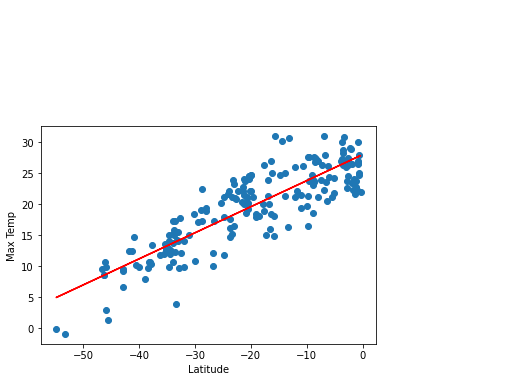

In [26]:
# Linear regression on Southern Hemisphere

southern_hemi_df.plot.scatter("Lat", "Max Temp")
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
print(f"The r-value is: {rvalue}")
plt.show()

**Discussion about the linear relationship:** From the data of the North Hemisphere, there is a negative corelation between the tempature and the latitude: the higher the latitude, the lower the max temperature is. The absolute r-value for the North Hemisphere data is 0.6009, which has a moderate correlation.
From the data of the South Hemisphere, there is a positive corelation between the tempature and the latitude: the higher the latitude, the higher the max temperature is. The absolute r-value for the South Hemisphere data is 0.8609, which has a strong correlation.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: -0.11012278202932396


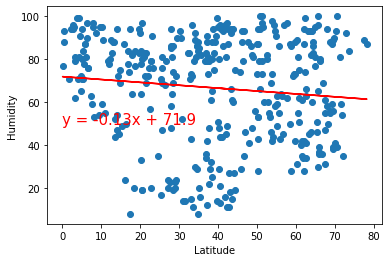

In [27]:
# Northern Hemisphere

northern_hemi_df.plot.scatter("Lat", "Humidity")
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f"The r-value is: {rvalue}")
plt.show()

The r-value is: -0.1489926681726861


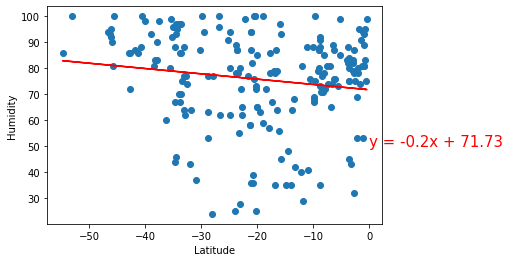

In [28]:
# Southern Hemisphere

southern_hemi_df.plot.scatter("Lat", "Humidity")
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f"The r-value is: {rvalue}")
plt.show()

**Discussion about the linear relationship:** From both the data of the North and South Hemisphere, the absolute r-values for both data is between 0.1 and 0.15, which is lower than 0.3. According to the Pearson's correlation, there is a very weak to no correlation between the latitude and the humidity.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.03614528520306971


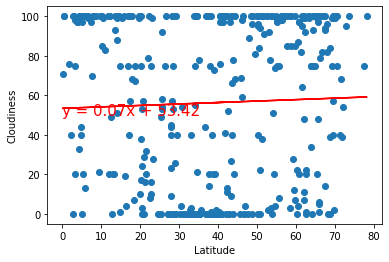

In [29]:
# Northern Hemisphere

northern_hemi_df.plot.scatter("Lat", "Cloudiness")
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f"The r-value is: {rvalue}")
plt.show()

The r-value is: 0.02501050745418159


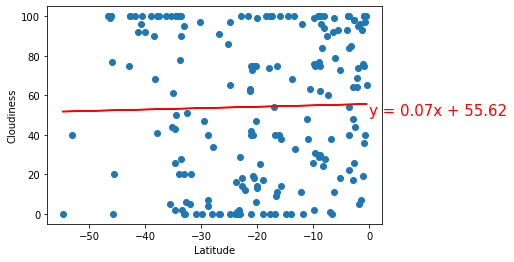

In [30]:
# Southern Hemisphere

southern_hemi_df.plot.scatter("Lat", "Cloudiness")
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f"The r-value is: {rvalue}")
plt.show()

**Discussion about the linear relationship:** From both the data of the North and South Hemisphere, the absolute r-values for both data is between 0.025 and 0.037, which is lower than 0.3. According to the Pearson's correlation, there is a very weak to no correlation between the latitude and the cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.027599952278056082


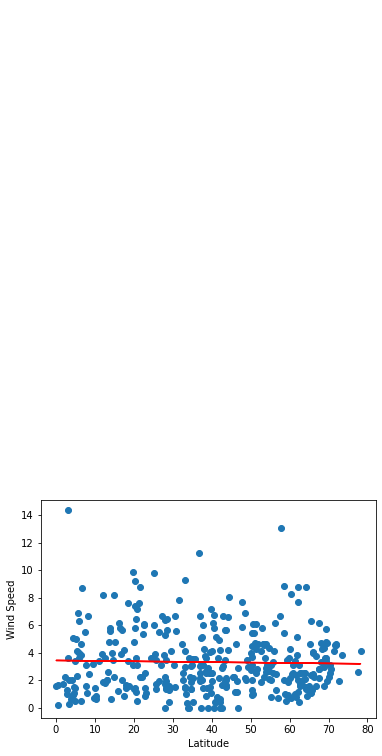

In [31]:
# Northern Hemisphere

northern_hemi_df.plot.scatter("Lat", "Wind Speed")
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f"The r-value is: {rvalue}")
plt.show()

The r-value is: -0.15884015459715725


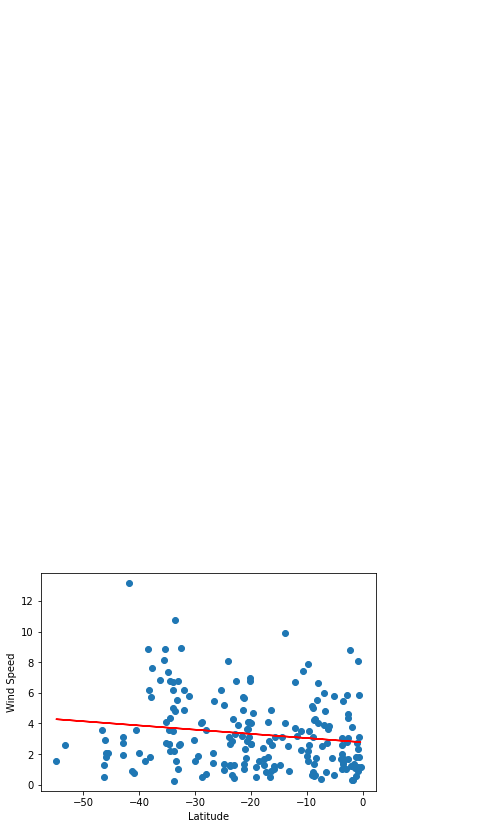

In [32]:
# Southern Hemisphere

southern_hemi_df.plot.scatter("Lat", "Wind Speed")
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f"The r-value is: {rvalue}")
plt.show()

**Discussion about the linear relationship:** From both the data of the North and South Hemisphere, the absolute r-values for both data is between 0.0276 and 0.1588, which is lower than 0.3. According to the Pearson's correlation, there is a very weak to no correlation between the latitude and the wind speed.